In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

import glob
import json
import warnings
import networkx as nx
import collections

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

warnings.filterwarnings("ignore")

In [2]:
def load_json(pth):
    try:
        return json.load(open(pth, "r"))
    except:
        return {}

In [3]:
tweets_pths = glob.glob("./tweets/*.json")
len(tweets_pths)

981062

In [4]:
for pth in tweets_pths[:5]:
    print(pth)
    print(load_json(pth))
    print()

./tweets/1505636536410415105.json
{'text': 'RT @drsimonegold: BREAKING: Fauci says it may be “necessary” to “re-institute” COVID-19 restrictions to stop an additional surge, such as f…', 'id': '1505636536410415105', 'public_metrics': {'retweet_count': 6882, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1450563887598817282', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1505239576117399552'}], 'created_at': '2022-03-20T20:04:58.000Z'}

./tweets/1505577860521934850.json
{'created_at': '2022-03-20T16:11:48.000Z', 'author_id': '1460673206323490823', 'in_reply_to_user_id': '738806388', 'id': '1505577860521934850', 'referenced_tweets': [{'type': 'replied_to', 'id': '1505577257191968771'}], 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': '@DataDrivenMD What you think of us will determine how much we can donate to areas hardest hit by COVID-19 to help treat them https://t.co/R4BLipLB8A'}

In [5]:
def get_tweet_id(pth):
    return pth.split(".json")[0].split("/")[-1]

get_tweet_id("./tweets/1505636536410415105.json")

'1505636536410415105'

In [6]:
tweets = json.load(open("./data/tweets.json", "r"))
tweets_df = pd.DataFrame(tweets).T
tweets_df.shape

(981062, 9)

In [7]:
tweets_df.head(10)

,text,id,public_metrics,author_id,lang,referenced_tweets,created_at,in_reply_to_user_id,withheld
1505636536410415105,RT @drsimonegold: BREAKING: Fauci says it may ...,1505636536410415105,"{'retweet_count': 6882, 'reply_count': 0, 'lik...",1450563887598817282,en,"[{'type': 'retweeted', 'id': '1505239576117399...",2022-03-20T20:04:58.000Z,NaN,NaN
1505577860521934850,@DataDrivenMD What you think of us will determ...,1505577860521934850,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1460673206323490823,en,"[{'type': 'replied_to', 'id': '150557725719196...",2022-03-20T16:11:48.000Z,738806388,NaN
1505535918152855558,"RT @aaronhoyland: Can we stop with this ""Why a...",1505535918152855558,"{'retweet_count': 6005, 'reply_count': 0, 'lik...",986277108514263040,en,"[{'type': 'retweeted', 'id': '1504832904962056...",2022-03-20T13:25:09.000Z,NaN,NaN
1505643442579423232,RT @MollyJongFast: When will the Fox News host...,1505643442579423232,"{'retweet_count': 742, 'reply_count': 0, 'like...",15114186,en,"[{'type': 'retweeted', 'id': '1505643067403079...",2022-03-20T20:32:24.000Z,NaN,NaN
1505595266996518915,RT @JackPosobiec: BREAKING: Twitter is censori...,1505595266996518915,"{'retweet_count': 4781, 'reply_count': 0, 'lik...",558026918,en,"[{'type': 'retweeted', 'id': '1505549024300089...",2022-03-20T17:20:58.000Z,NaN,NaN
1505495846653243399,RT @optimismworks00: People will start wearing...,1505495846653243399,"{'retweet_count': 160, 'reply_count': 0, 'like...",2789828315,en,"[{'type': 'retweeted', 'id': '1505439931312881...",2022-03-20T10:45:55.000Z,NaN,NaN
1505565294399418369,"RT @EMWResearch: ***This image, which has circ...",1505565294399418369,"{'retweet_count': 4240, 'reply_count': 0, 'lik...",485288051,en,"[{'type': 'retweeted', 'id': '1505283816016863...",2022-03-20T15:21:52.000Z,NaN,NaN
1505604632697049093,Things that Johnson has mismanaged\n1. Zaghari...,1505604632697049093,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",406583979,en,"[{'type': 'quoted', 'id': '1505441775338463233'}]",2022-03-20T17:58:11.000Z,NaN,NaN
1505687732798074889,Extend School Meal Waivers!\nH.R. 6613 allows ...,1505687732798074889,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",19065112,en,NaN,2022-03-20T23:28:24.000Z,NaN,NaN
1505650455304622087,Looking for Alpha? Get Alpha with LevelUp and ...,1505650455304622087,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1158490141570359296,en,NaN,2022-03-20T21:00:16.000Z,NaN,NaN


In [8]:
print(tweets_df.shape)
tweets_df = tweets_df[tweets_df.lang == "en"]
tweets_df.drop(columns=["id", "lang", "withheld"], inplace=True)
print(tweets_df.shape)

(981062, 9)
(981061, 6)


In [11]:
tweets_df.isna().sum()

text                        0
public_metrics              0
author_id                   0
referenced_tweets       97214
created_at                  0
in_reply_to_user_id    817067
dtype: int64

In [12]:
def compute_diffusion_graph(tweets):
    graph = nx.DiGraph()
    for tweet_id, tweet in tweets.items():
        if tweet:
            graph.add_node(tweet_id, text=tweet["text"], author_id=tweet["author_id"])
            if "referenced_tweets" in tweet:
                for reply_tweet in tweet["referenced_tweets"]:
                    graph.add_edge(reply_tweet["id"], tweet_id)
    return graph

In [13]:
%%time
graph = compute_diffusion_graph(tweets)

CPU times: user 3.26 s, sys: 212 ms, total: 3.47 s
Wall time: 3.47 s


In [15]:
print(graph)

DiGraph with 1112081 nodes and 887507 edges


In [18]:
%%time
nodes_connected = [
    list(c) for c in nx.connected_components(graph.to_undirected())
]

nodes_connected = sorted(nodes_connected, key=len, reverse=True)

CPU times: user 9.84 s, sys: 220 ms, total: 10.1 s
Wall time: 10.1 s


In [21]:
len(nodes_connected)

224699

In [19]:
top_connected_comp = [
    len(c) for c in nodes_connected[:15]
]
print(top_connected_comp)

[135008, 10500, 6854, 6581, 5493, 4367, 4125, 3513, 3436, 3329, 3203, 3010, 2978, 2950, 2788]


In [25]:
pd.Series([
    len(c) for c in nodes_connected
]).describe([0.80, 0.90, 0.95, 0.98, 0.99])

count    224699.000000
mean          4.949203
std         289.202984
min           1.000000
50%           2.000000
80%           3.000000
90%           4.000000
95%           7.000000
98%          18.000000
99%          37.000000
max      135008.000000
dtype: float64

In [20]:
users_id = nx.get_node_attributes(graph, "author_id")
len(set(users_id.values()))

490423

In [45]:
nodes = np.random.choice([
    c for c in nodes_connected if 130 > len(c) > 120
], 1)[0]

len(nodes)

129

In [46]:
example_graph = nx.subgraph(graph, nodes)

In [49]:
def draw_graph(G, edge_color=True, figsize=(10, 10), title="Communication Flow", default_size=15):
    plt.figure(figsize=figsize)
    labels = {node:node for node in G.nodes}
    
    if edge_color:
        # https://stackoverflow.com/a/60641770/12230833
        pos = nx.random_layout(G)
        
        d = dict(G.degree)
        
        nx.draw_networkx_nodes(G, pos, node_color = 'r', nodelist=d.keys(), node_size=[v * default_size for v in d.values()], alpha = 1)
        nx.draw_networkx_labels(G, pos, labels, font_size=6, font_color='b')
        
        
        ax = plt.gca()
        for e in G.edges:
            ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(
                    arrowstyle="<-", color="0.5",
                    shrinkA=5, shrinkB=5,
                    patchA=None, patchB=None,
                    connectionstyle="arc3,rad=0.3" # .replace('rrr',str(0.3*e[2])) #,rad=0.3 # .replace('rrr',str(0.3*e[2])
                ),
            )
        
    else:
        nx.draw_networkx(G, with_labels=True)
    
    plt.title(title)
    plt.axis('off')
    plt.show()

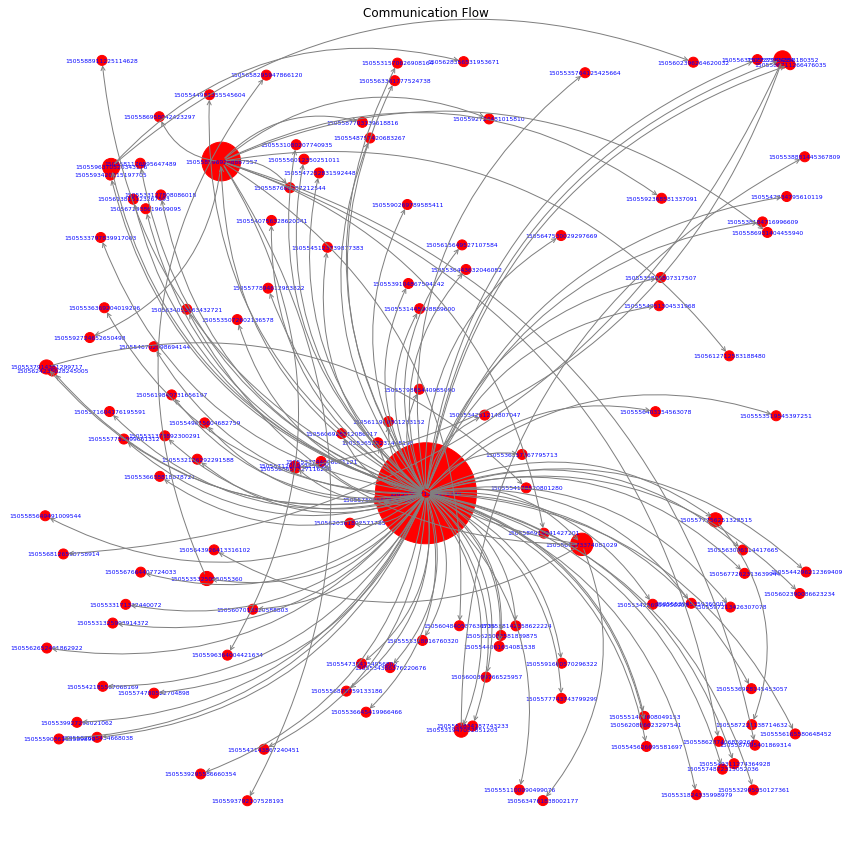

In [48]:
draw_graph(example_graph, figsize=(15, 15))

In [50]:
top_connected_comp_graphs = [
    graph.subgraph([i for i in c if len(graph.nodes[i]) > 0]) for c in nodes_connected if len(c) >= 10
]

len(top_connected_comp_graphs)

8489

In [51]:
print([len(g.nodes) for g in top_connected_comp_graphs[:15]])

[134381, 10454, 6850, 6564, 5471, 4365, 4123, 3511, 3434, 3327, 3203, 2992, 2978, 2949, 2788]


In [52]:
users_id = {}
for g in top_connected_comp_graphs:
    idx = nx.get_node_attributes(g, "author_id")
    for k,v in idx.items():
        users_id[k] = v
        
len(users_id)

661390

In [54]:
top_graph = nx.DiGraph()
top_nodes = []
for c in nodes_connected:
    if len(c) >= 10:
        top_nodes.extend(([i for i in c if len(graph.nodes[i])]))
top_graph = graph.subgraph(top_nodes)
                           
print(top_graph)

DiGraph with 661390 nodes and 387612 edges


In [55]:
users_count = collections.defaultdict(int)
for _, v in users_id.items():
    users_count[v] += 1

len(users_count)

338703

In [58]:
pd.Series(users_count).describe([0.75, 0.85, 0.95, 0.98])

count    338703.000000
mean          1.952714
std           2.991454
min           1.000000
50%           1.000000
75%           2.000000
85%           3.000000
95%           6.000000
98%          10.000000
max         280.000000
dtype: float64

In [59]:
users_count = {
    user for user, count in users_count.items() if count > 4
}
len(users_count)

24521

In [60]:
print(list(users_count)[:5])

['1497700421992865802', '899301623616425985', '204997855', '1385409296628920323', '1495662607679864835']


In [61]:
users_id = nx.get_node_attributes(top_graph, "author_id")

In [62]:
users_id = {
    node for node, user_id in users_id.items() if user_id in users_count
}
len(users_id)

227956

In [63]:
top_graph = top_graph.subgraph(list(users_id))

len(top_graph)

227956

In [64]:
print(top_graph)

DiGraph with 227956 nodes and 59119 edges


In [65]:
top_nodes_connected = [
    list(c) for c in nx.connected_components(top_graph.to_undirected())
]

top_nodes_connected = sorted(top_nodes_connected, key=len, reverse=True)

In [67]:
len(top_nodes_connected)

168839

In [69]:
print([len(c) for c in top_nodes_connected[:10]])

[2310, 1110, 1007, 830, 685, 635, 573, 567, 530, 501]


In [70]:
pd.Series([len(c) for c in top_nodes_connected]).describe()

count    168839.000000
mean          1.350138
std           9.813562
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        2310.000000
dtype: float64

In [71]:
print(graph)

DiGraph with 1112081 nodes and 887507 edges


In [72]:
nx.write_gpickle(graph, "./diffusion/graphe.pkl")